In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Necessary Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Set plot style for consistency

In [2]:
sns.set(style="whitegrid")

# 1. Load and Explore the Data

In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/All About ML/Advertising.csv')

In [5]:
# Dataset Head
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# Check for missing value in each column
print("\n Missing Values in Each Column:")
print(df.isnull().sum())


 Missing Values in Each Column:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [7]:
# Dispkay summary and statistics
print("\n Summary Statistics:")
print(df.describe())


 Summary Statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


# Visualization for data understanding

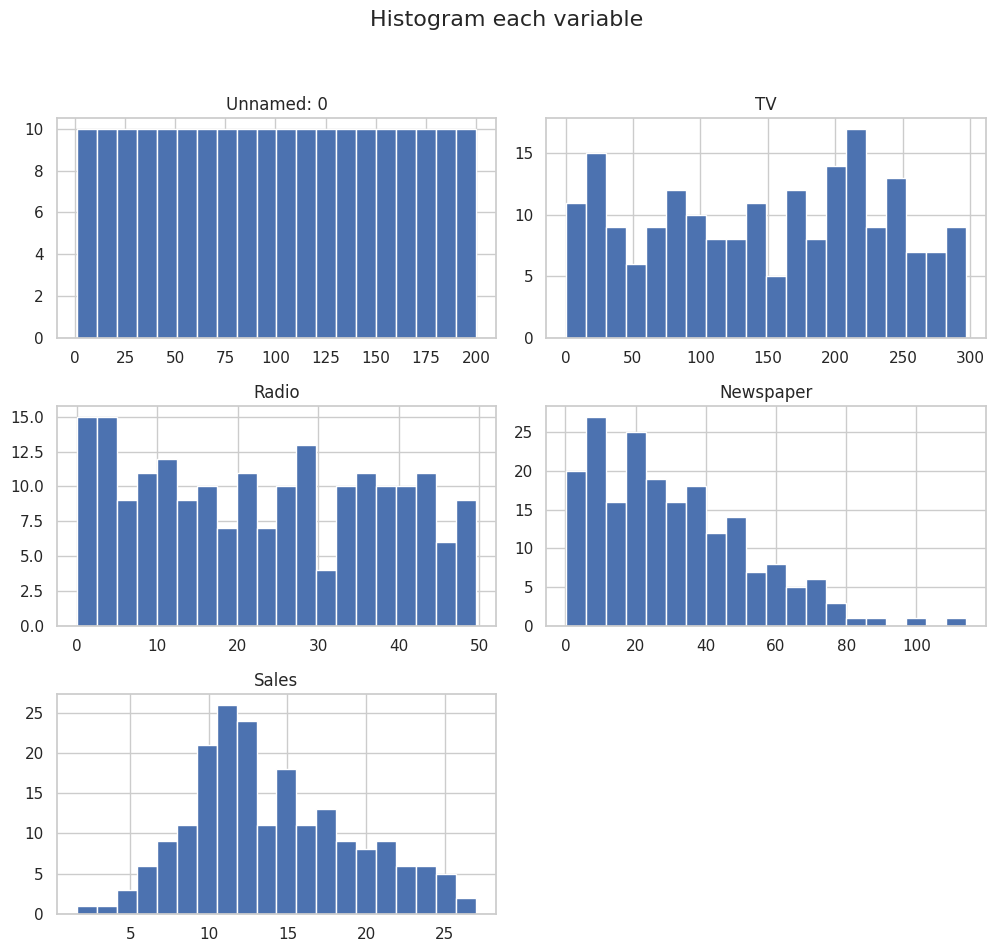

In [9]:
# Histogram : Understand the distribution
df.hist(bins=20, figsize=(10, 10))
plt.suptitle("Histogram each variable", fontsize=16)
plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plt.show()

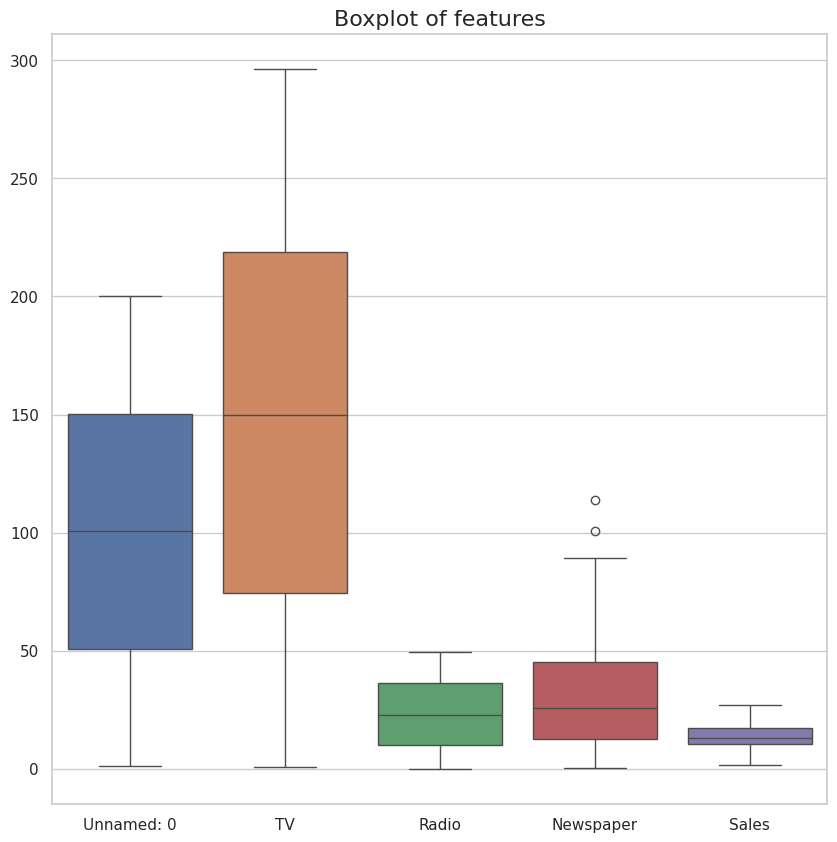

In [10]:
# Boxplot : Identify outliers in each variable
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.title("Boxplot of features", fontsize=16)
plt.show()

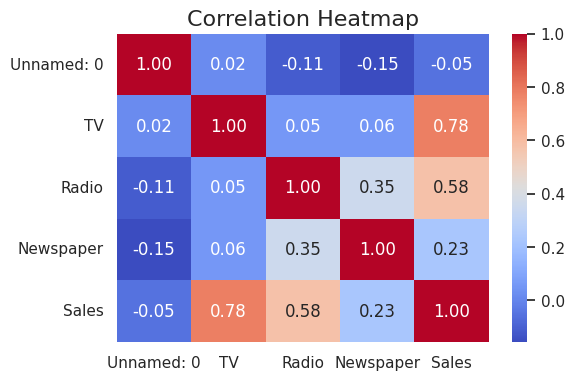

In [11]:
# 3. Correlation Heatmap: Visualize the relationship between variables.
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


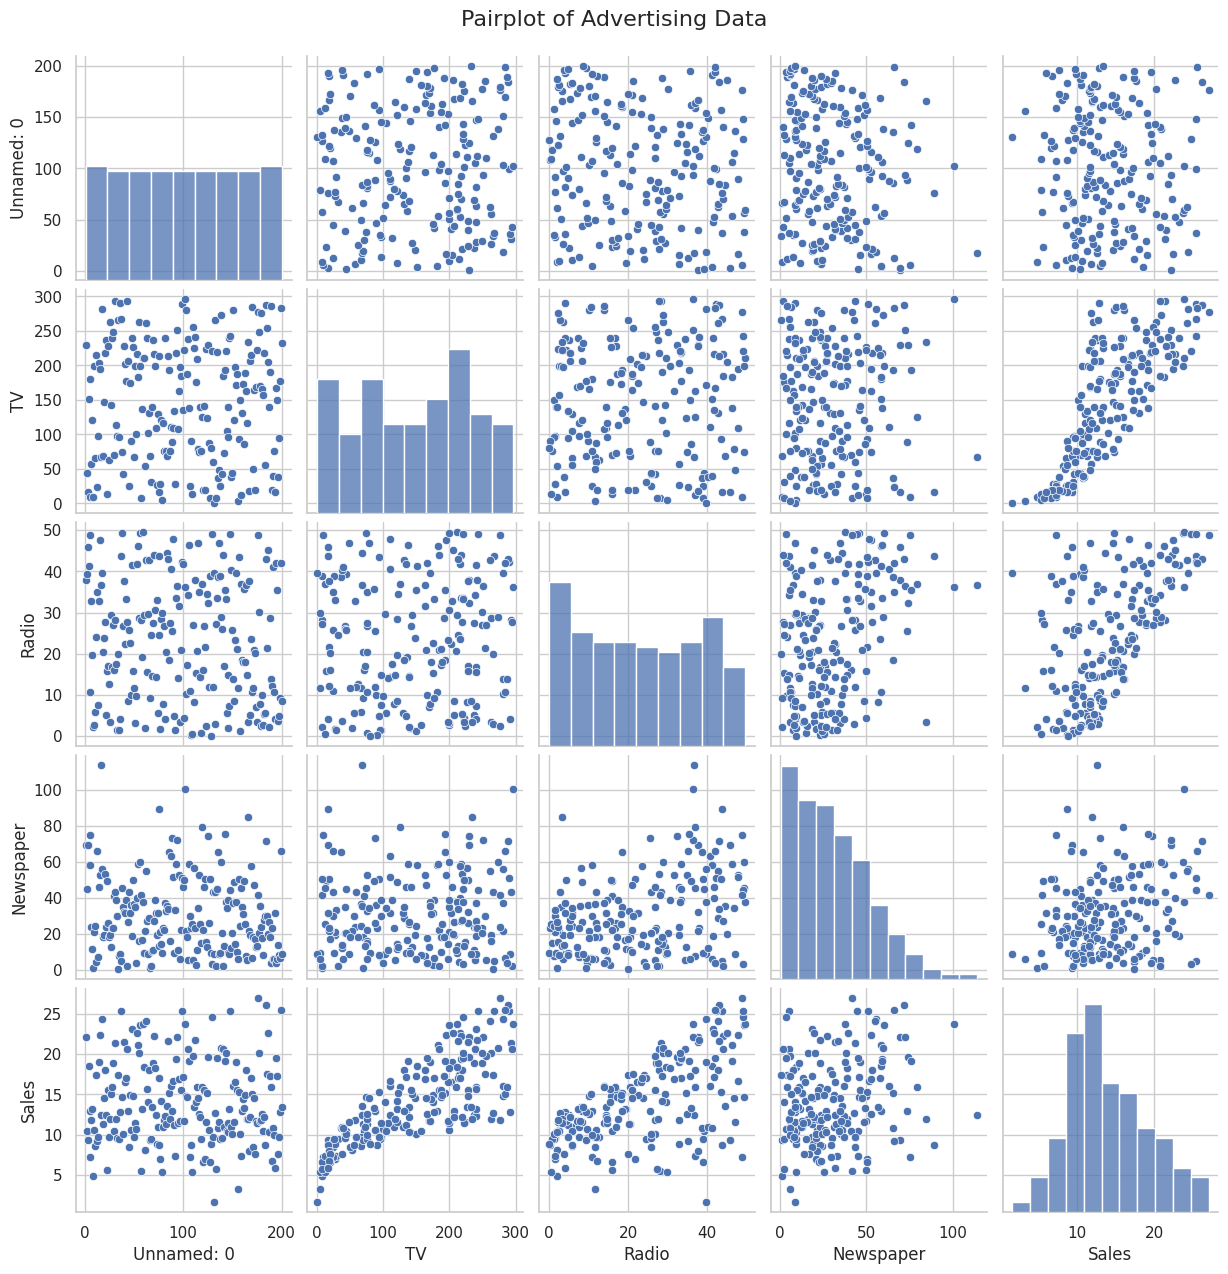

In [12]:
# 4. Pairplot: Visualize pairwise relationships among features.
sns.pairplot(df)
plt.suptitle("Pairplot of Advertising Data", y=1.02, fontsize=16)
plt.show()

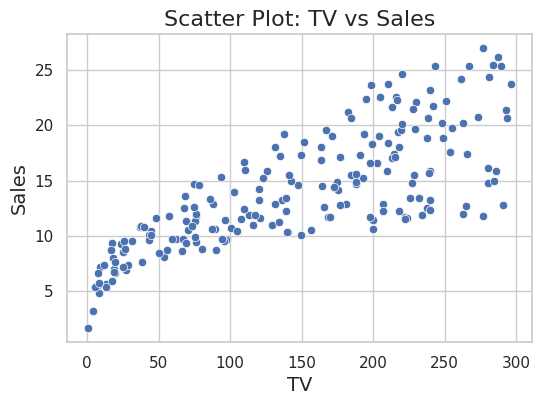

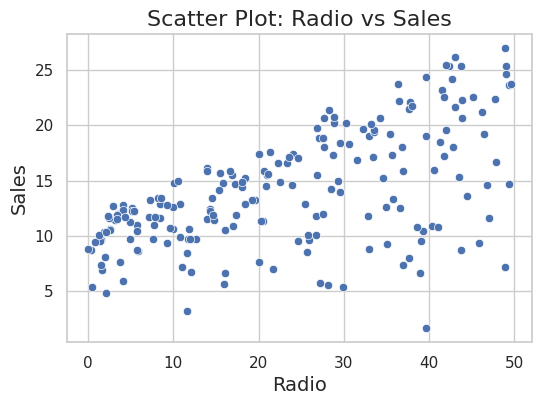

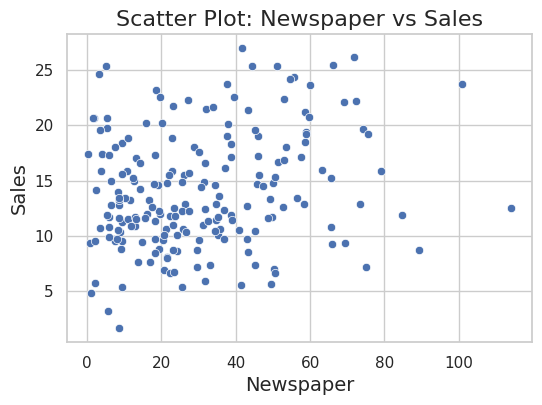

In [13]:
# 5. Scatter Plots: Visualize the relationship of each feature with Sales.
features = ['TV', 'Radio', 'Newspaper']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Sales'])
    plt.title(f"Scatter Plot: {feature} vs Sales", fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Sales", fontsize=14)
    plt.show()

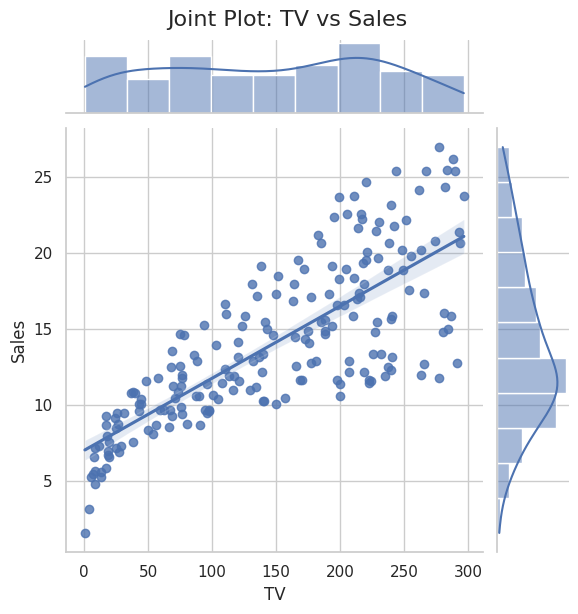

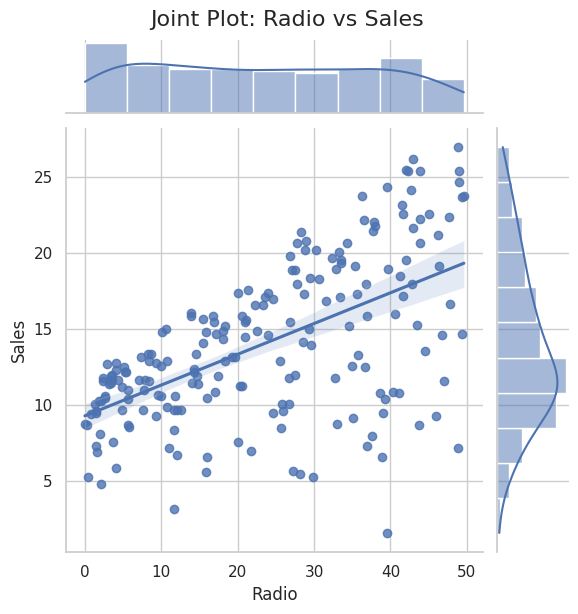

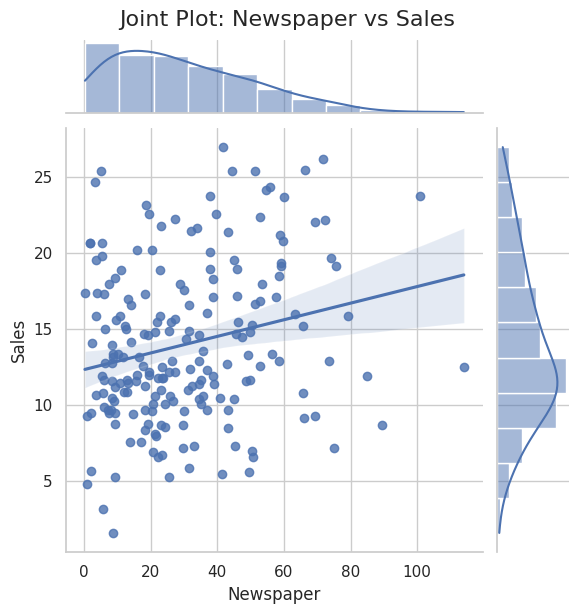

In [14]:
# 6. Joint Plots with Regression Lines: Get a combined view with histograms.
for feature in features:
    sns.jointplot(x=feature, y='Sales', data=df, kind='reg', height=6)
    plt.suptitle(f"Joint Plot: {feature} vs Sales", y=1.02, fontsize=16)
    plt.show()

# 2. Prepare the Data for Regression

In [15]:
# Select the features (TV, Radio, Newspaper) and target (Sales)
X_features = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

In [16]:
# Feature Scaling: Standardize the features to improve gradient descent convergence.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

In [17]:
# Add an intercept term (column of ones) to the scaled features.
X = np.concatenate([np.ones((X_scaled.shape[0], 1)), X_scaled], axis=1)

In [18]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Implement Linear Regression using Gradient Descent

In [19]:
def compute_cost(X, y, theta):
    """
    Compute the Mean Squared Error (MSE) cost for linear regression.
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [20]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    """
    Perform gradient descent to learn theta by minimizing the cost function.
    Returns the final theta and a history of cost values.
    """
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        # Update theta using the gradient
        theta = theta - (learning_rate / m) * (X.T.dot(errors))
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        # Print cost every 100 iterations for progress tracking.
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")
    return theta, cost_history

In [21]:
# Initialize parameters (theta) to zeros.
theta_initial = np.zeros(X_train.shape[1])

In [22]:
# Set hyperparameters.
learning_rate = 0.01  # A higher learning rate is acceptable with scaled features.
iterations = 1000

In [23]:
# Run gradient descent to optimize theta.
theta_final, cost_history = gradient_descent(X_train, y_train, theta_initial, learning_rate, iterations)

print("\nOptimized Theta Parameters:")
print(theta_final)

Iteration 0: Cost 110.1334
Iteration 100: Cost 15.6080
Iteration 200: Cost 3.2521
Iteration 300: Cost 1.6140
Iteration 400: Cost 1.3909
Iteration 500: Cost 1.3589
Iteration 600: Cost 1.3538
Iteration 700: Cost 1.3529
Iteration 800: Cost 1.3526
Iteration 900: Cost 1.3526

Optimized Theta Parameters:
[14.04142097  3.83093398  2.79851601  0.06385596]


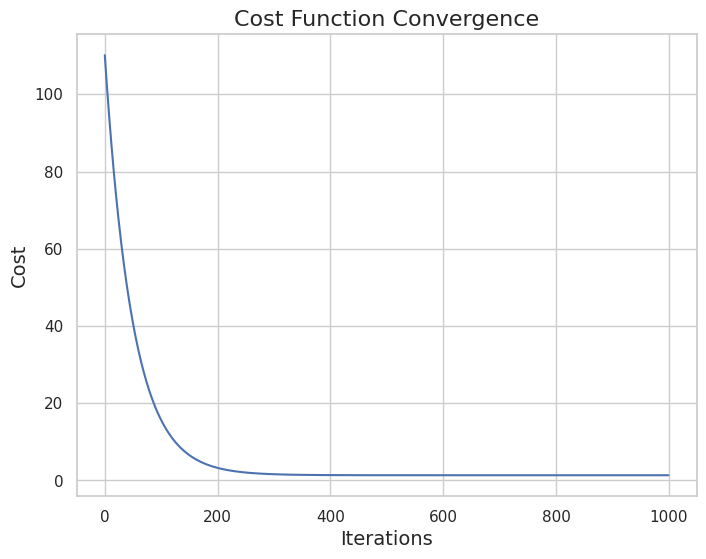

In [24]:
# Plot the cost function history to observe convergence.
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, 'b-')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Cost Function Convergence', fontsize=16)
plt.show()

# 4. Evaluate the Model

In [25]:
# Make predictions on the test set using the optimized parameters.
y_pred = X_test.dot(theta_final)

In [26]:
# Calculate performance metrics: Mean Squared Error (MSE) and R² Score.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation on Test Data:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation on Test Data:
Mean Squared Error: 3.1757
R² Score: 0.8994


# Additional Visualizations for Model Evaluation

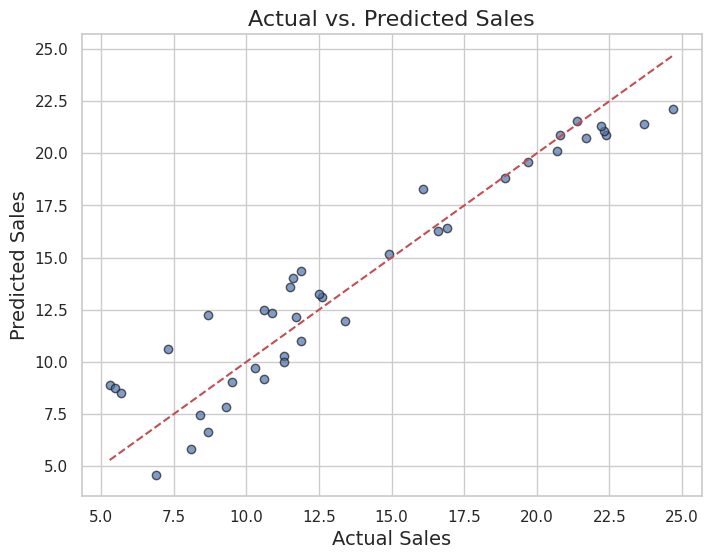

In [27]:
# 1. Scatter Plot: Actual vs. Predicted Sales.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.xlabel("Actual Sales", fontsize=14)
plt.ylabel("Predicted Sales", fontsize=14)
plt.title("Actual vs. Predicted Sales", fontsize=16)
# Plot an ideal diagonal line (perfect predictions).
min_val, max_val = min(y_test), max(y_test)
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

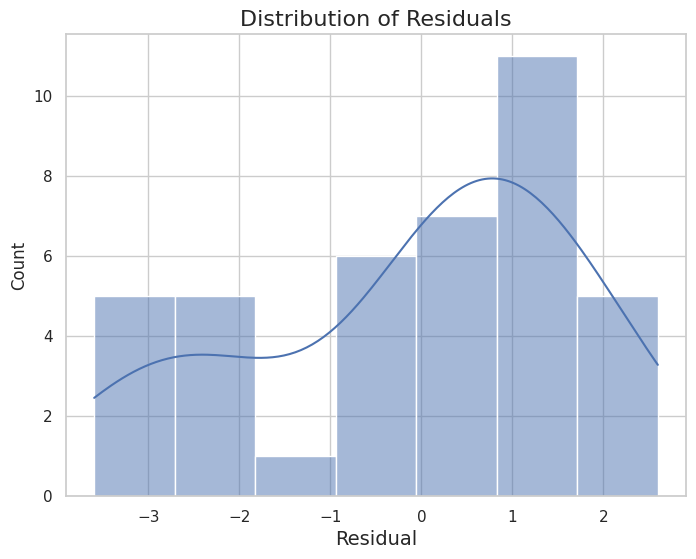

In [28]:
# 2. Residual Analysis: Check distribution of errors.

# Compute residuals (errors between actual and predicted values).
residuals = y_test - y_pred

# Histogram and KDE of residuals.
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals", fontsize=16)
plt.xlabel("Residual", fontsize=14)
plt.show()

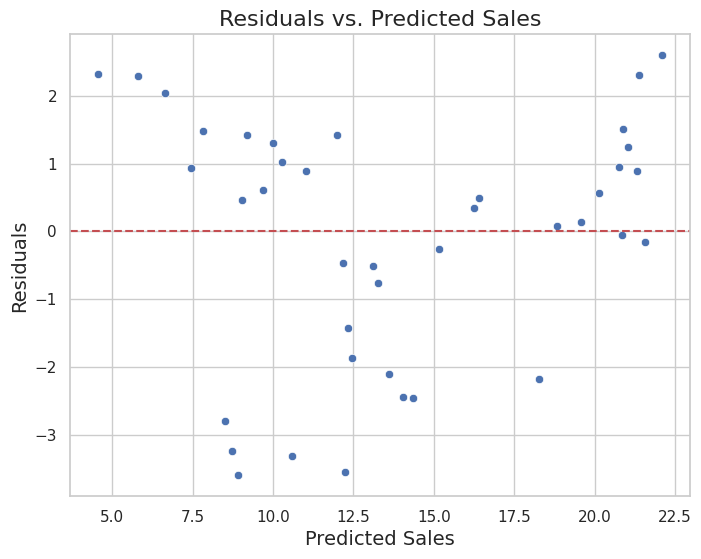

In [29]:
# Scatter Plot: Residuals vs. Predicted Sales to check for patterns.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Sales", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title("Residuals vs. Predicted Sales", fontsize=16)
plt.show()

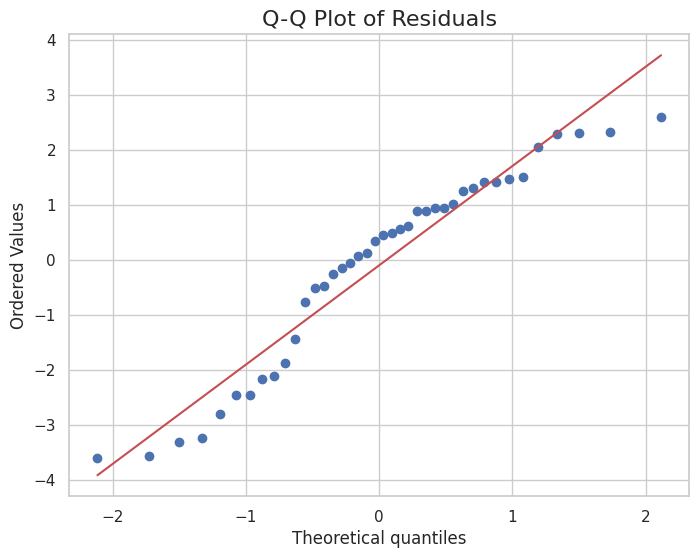

In [30]:
# Q-Q Plot: Assess whether residuals follow a normal distribution.
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals", fontsize=16)
plt.show()